In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/interactive_data.csv')
data.head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
0,1,None selected,None selected,None selected,None selected,33599,316299978,10.6
1,2,None selected,None selected,None selected,White,22079,197369634,11.2
2,3,None selected,None selected,None selected,Black,7765,38896382,20.0
3,4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
4,5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


<Axes: title={'center': 'Gun Deaths by Intent'}, xlabel='Intention', ylabel='Percent of Total Deaths'>

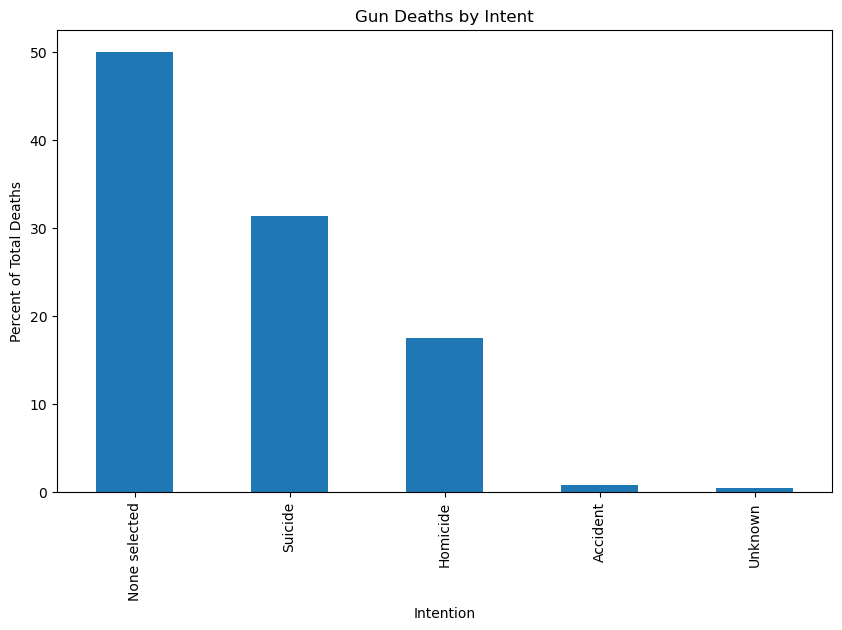

In [19]:
data['Deaths'] = data['Deaths'].astype(int)
death_stats = data.groupby('Intent')['Deaths'].sum() / data['Deaths'].sum() * 100
death_stats = death_stats.sort_values(ascending=False)
death_stats.plot(kind='bar', figsize=(10, 6), title='Gun Deaths by Intent', ylabel='Percent of Total Deaths', xlabel='Intention')

In [22]:
suicide_data = data[data['Intent'] == 'Suicide']
suicide_gender_stats = suicide_data.groupby('Gender')['Deaths'].sum() / suicide_data['Deaths'].sum() * 100
suicide_gender_stats

Gender
Female            6.878027
Male             43.122566
None selected    49.999406
Name: Deaths, dtype: float64

In [28]:
homicide_male_1534_data = data[(data['Intent'] == 'Homicide') & (data['Gender'] == 'Male') & (data['Age'] == '15 - 34')]
homicide_male_1534_data.head()


,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
300,301,Homicide,Male,15 - 34,None selected,6520,44017869,14.8
301,302,Homicide,Male,15 - 34,White,913,24831032,3.7
302,303,Homicide,Male,15 - 34,Black,4312,5869943,73.5
303,304,Homicide,Male,15 - 34,Hispanic,1166,9379683,12.4
304,305,Homicide,Male,15 - 34,Asian/Pacific Islander,76,2415040,3.1


In [29]:
homicide_male_1534_stats = homicide_male_1534_data.groupby('Race')['Deaths'].sum() / homicide_male_1534_data['Deaths'].sum() * 100
homicide_male_1534_stats

Race
Asian/Pacific Islander     0.582777
Black                     33.064949
Hispanic                   8.941032
None selected             49.996166
Other                      0.414079
White                      7.000997
Name: Deaths, dtype: float64

In [30]:
homicide_data = data[data['Intent'] == 'Homicide']
homicide_stats = homicide_data.groupby('Gender')['Deaths'].sum() / homicide_data['Deaths'].sum()
homicide_stats

Gender
Female           0.076401
Male             0.423621
None selected    0.499979
Name: Deaths, dtype: float64